In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

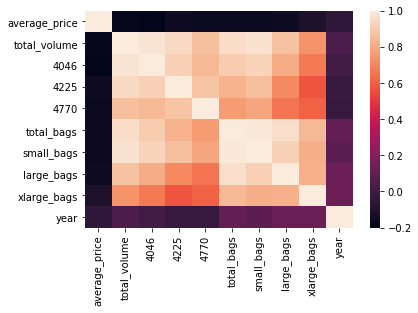

In [2]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
corr = df.corr()


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [3]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
df = df[df['geography'] == 'Total U.S.']
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
grouped = df.groupby(['year', 'month']).mean()
grouped.head()

<ipython-input-4-614015c4e56c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].apply(lambda x: x.split('-')[1])
<ipython-input-4-614015c4e56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].apply(lambda x: x.split('-')[0])


average_price  total_volume          4046          4225  \
year month                                                            
2015 01            1.2325  1.505669e+07  6.111703e+06  6.149645e+06   
     02            1.2275  1.718793e+07  7.311859e+06  6.808472e+06   
     03            1.2560  1.587573e+07  6.694906e+06  6.104917e+06   
     04            1.2975  1.631906e+07  7.219332e+06  5.908519e+06   
     05            1.2570  1.827522e+07  8.138431e+06  6.689806e+06   

                    4770    total_bags    small_bags    large_bags  \
year month                                                           
2015 01     415870.75750  2.379471e+06  1.954999e+06  418093.47250   
     02     490406.29000  2.577192e+06  2.156895e+06  409537.64625   
     03     468142.75500  2.607765e+06  2.238782e+06  354610.27900   
     04     451439.66625  2.739770e+06  2.329308e+06  399510.53375   
     05     479464.84300  2.967514e+06  2.504960e+06  451378.08400   

            xlarge_bags  
year month               
2015 01      6378.57750  
     02     10759.73875  
     03     14372.52300  
     04     10951.84625  
     05     11175.70600

In [5]:
data = pd.DataFrame({'average_price': grouped['average_price'],
                     'total_volume': grouped['total_volume']})

x, y = data['average_price'], data['total_volume']



In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)
xTrain, yTrain = np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1)
xTest, yTest = np.array(xTest).reshape(-1,1), np.array(yTest).reshape(-1,1)

In [7]:
res = LinearRegression().fit(xTrain, yTrain)

In [8]:
score = res.score(np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1))
print(f'RSQ = {score}')

RSQ = 0.07862049111231462


In [9]:
predictions = res.predict(xTest)
actual = []
predictionCol = []
for a in yTest:
    actual.append(a[0])
for p in predictions:
    predictionCol.append(p[0])
predictionDF = pd.DataFrame({'Predicted': predictionCol,
                              'Actual': actual})
predictionDF.head()

,Predicted,Actual
0,1.993325e+07,2.354767e+07
1,1.892594e+07,1.444759e+07
2,1.803486e+07,2.093133e+07
3,1.910997e+07,2.613317e+07
4,1.821889e+07,1.223828e+07


In [10]:
# Result analysis
predictionDF['Error'] = predictionDF['Actual'] - predictionDF['Predicted']
predictionDF['Error'] = predictionDF['Error'].apply(abs)
predictionDF['pctError'] = (predictionDF['Error'] / predictionDF['Actual']) * 100
predictionDF.head()

,Predicted,Actual,Error,pctError
0,1.993325e+07,2.354767e+07,3.614418e+06,15.349368
1,1.892594e+07,1.444759e+07,4.478352e+06,30.997227
2,1.803486e+07,2.093133e+07,2.896470e+06,13.837964
3,1.910997e+07,2.613317e+07,7.023199e+06,26.874656
4,1.821889e+07,1.223828e+07,5.980615e+06,48.868114


In [11]:
meanAbsErr = predictionDF['pctError'].mean()
print(f'Mean absolute Error = {round(meanAbsErr, 2)}%')

Mean absolute Error = 15.07%


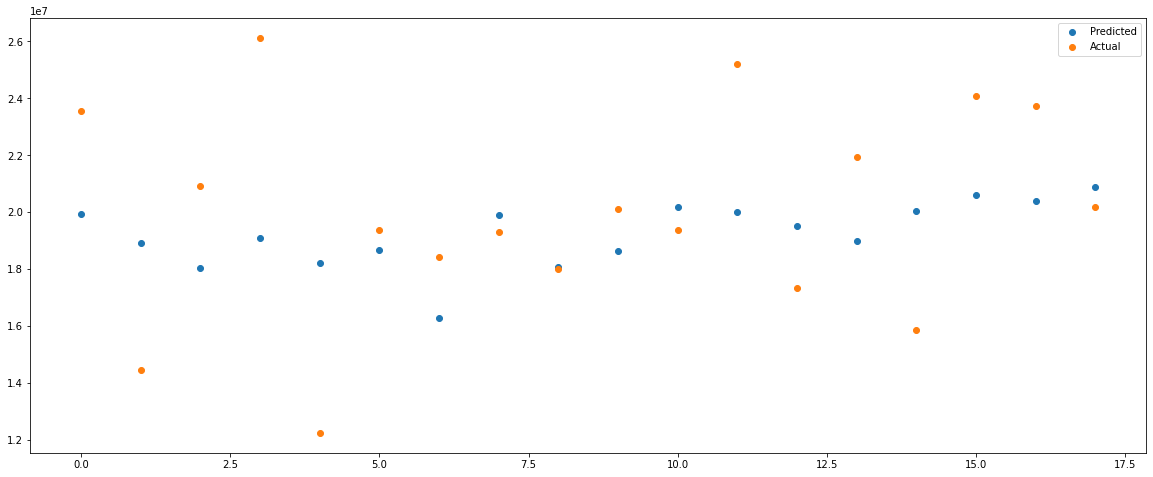

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(predictionDF.index, predictionDF['Predicted'])
plt.scatter(predictionDF.index, predictionDF['Actual'])
plt.legend(['Predicted', 'Actual'])
plt.show()

Mostly overly-fitted linear measurements, However this model somewhat accurately follows dips in the avocado market (presumably droughts or other big market events)

In [13]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['type'] = df['type'].apply(lambda x: 1 if x == 'organic' else 0)
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,Albany,01
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,Albany,01
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,Atlanta,01
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,Atlanta,01
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,Baltimore/Washington,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,1,2020,Total U.S.,11
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,0,2020,West,11
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,1,2020,West,11
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,0,2020,West Tex/New Mexico,11


In [14]:
df = pd.merge(df, pd.get_dummies(df['geography']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['month']), left_index=True, right_index=True)
for col in ['4046', '4225', '4770', 'small_bags', 'large_bags']:
    del df[col]
df.columns

Index(['date', 'average_price', 'total_volume', 'total_bags', 'xlarge_bags',
       'type', 'year', 'geography', 'month', 'Albany', 'Atlanta',
       'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester',
       'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus',
       'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes',
       'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
       'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville',
       'New Orleans/Mobile', 'New York', 'Northeast', 'Northern New England',
       'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Plains',
       'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/

In [15]:
y = df['average_price']
x = df[['total_volume','year', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12' ]]
# Avoid perfect multicollinearity for all dummy variables
for col in [ 'Albany', '01']:
    del x[col]
x

,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,03,04,05,06,07,08,09,10,11,12
0,40873.28,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1373.95,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435021.49,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3846.69,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,788025.06,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,1583056.27,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33041,5811114.22,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33042,289961.27,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33043,822818.75,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)


In [17]:
xTrain

,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,03,04,05,06,07,08,09,10,11,12
377,4448.88,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29498,116078.67,2020,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6387,752336.04,2016,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1669,2879.62,2015,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3228,216993.01,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11546,3179.45,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3333,28234.61,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1104,662131.80,2015,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1670,2711008.32,2015,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
res = LinearRegression().fit(xTrain, yTrain)
score = res.score(xTrain, yTrain)
print(f'RSQ = {score}')

RSQ = 0.2432972016412983


In [19]:
xTest['prediction'] = res.predict(xTest)
xTest

<ipython-input-19-c8bdccf9a939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['prediction'] = res.predict(xTest)


,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,04,05,06,07,08,09,10,11,12,prediction
26320,18432.33,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.335601
28981,277685.72,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.301521
29651,663937.80,2020,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.311121
11409,1890389.78,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.254306
13040,6764.99,2017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.590468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,3893.76,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.323935
32247,1350137.63,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.207582
26643,170809.80,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.280406
16221,701022.00,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.240265


In [20]:
xTest.columns

Index(['total_volume', 'year', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico', '02', '03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', 'prediction'],


In [21]:
xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


<ipython-input-21-0f368dbf8cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
<ipython-input-21-0f368dbf8cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


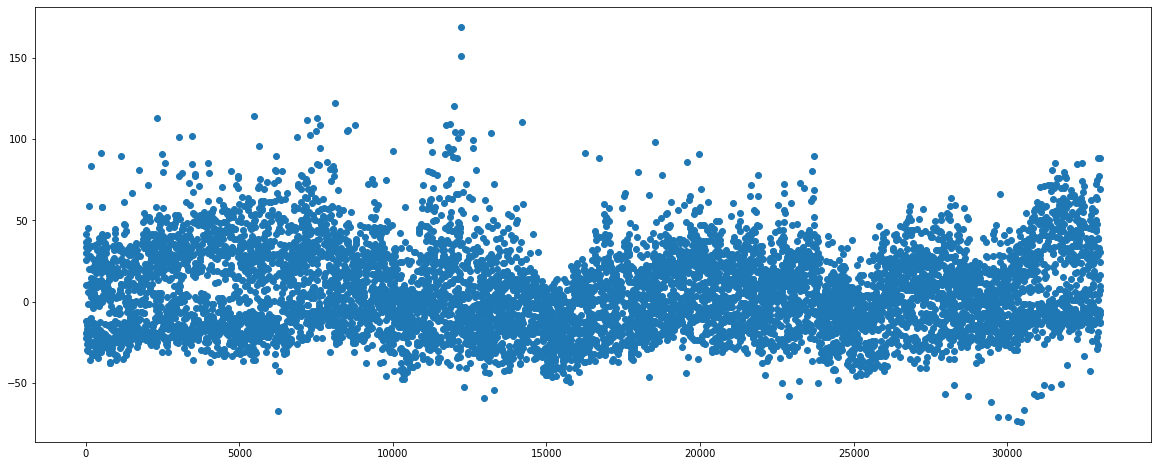

In [22]:
plt.figure(figsize=(20,8))
plt.scatter(xTest.index, xTest['pctAbsDiff'])

<AxesSubplot:>

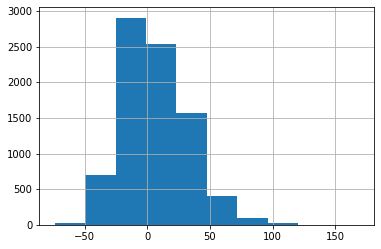

In [23]:
xTest['pctAbsDiff'].hist()

In [24]:
res.coef_

array([-2.99095449e-08, -1.06255716e-02, -1.76956809e-01, -1.53261112e-02,
       -5.61515210e-02,  3.71173984e-02, -1.01189181e-01,  4.92048295e-02,
        6.28876240e-02,  2.96888097e-02, -2.58014990e-01, -2.86338748e-01,
       -4.00953854e-01, -2.17141246e-01, -2.38716012e-01, -5.61504722e-02,
       -1.36407461e-01, -1.13485902e-01,  2.65030531e-01, -3.94569680e-01,
       -2.40394150e-01, -1.01995170e-01, -1.26823602e-01, -1.45594309e-01,
       -2.37929389e-01, -1.63400496e-01, -7.00203347e-02, -2.66768913e-01,
       -2.68323534e-01,  1.83004516e-01,  1.14599237e-01, -4.02757102e-02,
       -1.39404556e-01,  3.10491577e-02, -2.87127085e-01, -1.77475500e-01,
       -1.07598417e-01, -8.68734664e-02,  5.44080159e-02, -2.50860343e-01,
       -2.60202251e-01,  8.84096473e-02, -3.91163483e-02,  2.75793705e-01,
        3.24826117e-02, -1.31796951e-01, -3.01698633e-01, -1.03260369e-01,
       -1.03073962e-04, -3.65283645e-02, -8.68348359e-02, -2.03920924e-01,
        4.18101356e-01, -

In [25]:
colDict = {}

# Add back in the columsn we deleted for multicollinearity reasons

for xCol, coef in zip(x.columns, res.coef_):
    colDict[xCol] = coef


In [26]:
colDict

{'total_volume': -2.990954492552639e-08,
 'year': -0.010625571648733734,
 'Atlanta': -0.17695680885186238,
 'Baltimore/Washington': -0.015326111217081245,
 'Boise': -0.056151521003230676,
 'Boston': 0.03711739839739761,
 'Buffalo/Rochester': -0.10118918116698816,
 'California': 0.04920482945648422,
 'Charlotte': 0.06288762399298928,
 'Chicago': 0.029688809703073353,
 'Cincinnati/Dayton': -0.2580149898790538,
 'Columbus': -0.2863387480418623,
 'Dallas/Ft. Worth': -0.40095385361338454,
 'Denver': -0.21714124597152262,
 'Detroit': -0.23871601176974458,
 'Grand Rapids': -0.05615047221419127,
 'Great Lakes': -0.1364074610999464,
 'Harrisburg/Scranton': -0.11348590169489298,
 'Hartford/Springfield': 0.2650305309626024,
 'Houston': -0.39456967996366704,
 'Indianapolis': -0.24039414961512084,
 'Jacksonville': -0.10199516998955499,
 'Las Vegas': -0.12682360162054873,
 'Los Angeles': -0.14559430866836573,
 'Louisville': -0.23792938864924235,
 'Miami/Ft. Lauderdale': -0.16340049610434687,
 'Midso

In [27]:
# import joblib
# filename = 'finalized_model.sav'
# joblib.dump(res, filename)